In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import acquire
import prepare
import numpy as np
import env

from pydataset import data

First in my analysis, using the order in which we did in class, I want to do some hypothesis testing by looking for relationship between variables in the dataset.

First I am going to aquire the dataset.

In [2]:
clean_telco = ct = prepare.prep_telco()

In [3]:
ct.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'signup_date',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [4]:
unclean_telco = ut = acquire.get_telco_data()

In [5]:
ut.columns.to_list()

['customer_id',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'signup_date']

In [6]:
# I am looking at the dtypes to see initally which features I can graph categorcially
# and which I can graph continuously
ut.dtypes

customer_id                  object
payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
churn_month                  object
signup_date                  object
dtype: object

In [7]:
ut.head(10)

,customer_id,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,signup_date
0,0002-ORFBO,2,1,2,Female,0,Yes,Yes,9,Yes,...,No,Yes,65.60,593.3,No,One year,DSL,Mailed check,NaN,2021-04-21 18:07:34
1,0003-MKNFE,2,1,1,Male,0,No,No,9,Yes,...,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check,NaN,2021-04-21 18:07:34
2,0004-TLHLJ,1,2,1,Male,0,No,No,4,Yes,...,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2021-09-21 18:07:34
3,0011-IGKFF,1,2,1,Male,1,Yes,No,13,Yes,...,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2020-12-21 18:07:34
4,0013-EXCHZ,2,2,1,Female,1,Yes,No,3,Yes,...,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,2022-01-31,2021-10-21 18:07:34
5,0013-MHZWF,4,1,1,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic),NaN,2021-04-21 18:07:34
6,0013-SMEOE,3,2,3,Female,1,Yes,No,71,Yes,...,Yes,Yes,109.70,7904.25,No,Two year,Fiber optic,Bank transfer (automatic),NaN,2016-02-21 18:07:34
7,0014-BMAQU,4,2,3,Male,0,Yes,No,63,Yes,...,No,Yes,84.65,5377.8,No,Two year,Fiber optic,Credit card (automatic),NaN,2016-10-21 18:07:34
8,0015-UOCOJ,1,1,1,Female,1,No,No,7,Yes,...,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check,NaN,2021-06-21 18:07:34
9,0016-QLJIS,2,1,3,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check,NaN,2016-08-21 18:07:34


In [8]:
# in order to make some initial visualizations, I will put my unclean data into 
# columns to then make some graphs
cat_cols , num_cols = [], []
for col in ut.columns:
    if ut[col].dtype == "o":
        cat_cols.append(col)
    else:
        if ut[col].nunique() < 10:
            cat_cols.append(col)
        else: num_cols.append(col)

In [9]:
cat_cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

In [10]:
num_cols

['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'signup_date']

In [11]:
# Im going to take out some unnecessary columns from each of my new columns
cat_cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

In [12]:
cat_cols.remove('payment_type_id')
cat_cols.remove('internet_service_type_id')
cat_cols.remove('contract_type_id')
num_cols.remove('customer_id')

In [13]:
# I removed the redundant columns and now I have desctiptive string columns or numeric
# columns 
ut[cat_cols]

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,contract_type,internet_service_type,payment_type,churn_month
0,Female,0,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,One year,DSL,Mailed check,NaN
1,Male,0,No,No,Yes,Yes,No,No,No,No,No,Yes,No,No,Month-to-month,DSL,Mailed check,NaN
2,Male,0,No,No,Yes,No,No,No,Yes,No,No,No,Yes,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31
3,Male,1,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31
4,Female,1,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Yes,Yes,Month-to-month,Fiber optic,Mailed check,2022-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,One year,DSL,Mailed check,NaN
7039,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31
7040,Male,0,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,Month-to-month,DSL,Mailed check,NaN
7041,Male,0,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,Two year,DSL,Mailed check,NaN


In [14]:
ut[num_cols]

,tenure,monthly_charges,total_charges,signup_date
0,9,65.60,593.3,2021-04-21 18:07:34
1,9,59.90,542.4,2021-04-21 18:07:34
2,4,73.90,280.85,2021-09-21 18:07:34
3,13,98.00,1237.85,2020-12-21 18:07:34
4,3,83.90,267.4,2021-10-21 18:07:34
...,...,...,...,...
7038,13,55.15,742.9,2020-12-21 18:07:34
7039,22,85.10,1873.7,2020-03-21 18:07:34
7040,2,50.30,92.75,2021-11-21 18:07:34
7041,67,67.85,4627.65,2016-06-21 18:07:34


In [15]:
# Great! Now we will make some graphs

In [16]:
explore_cols = cat_cols + num_cols

In [17]:
# we will make a for loop that will make our graphs

Univariate assessment of feature gender:


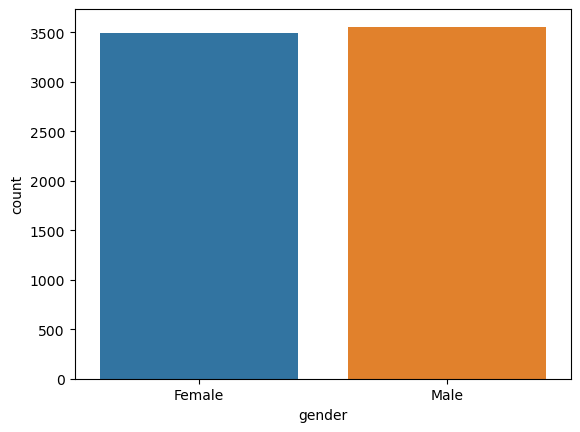

_____________________________________________________
_____________________________________________________

Univariate assessment of feature senior_citizen:


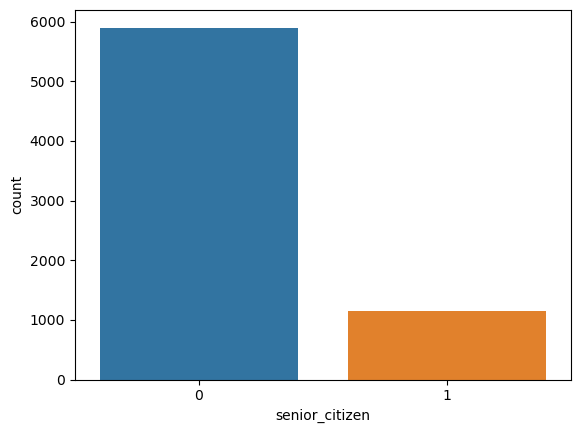

_____________________________________________________
_____________________________________________________

Univariate assessment of feature partner:


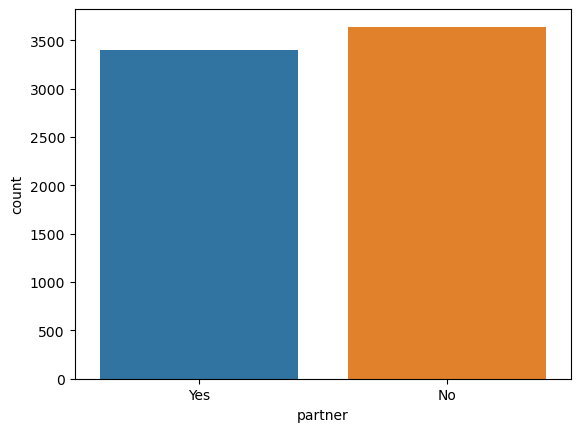

_____________________________________________________
_____________________________________________________

Univariate assessment of feature dependents:


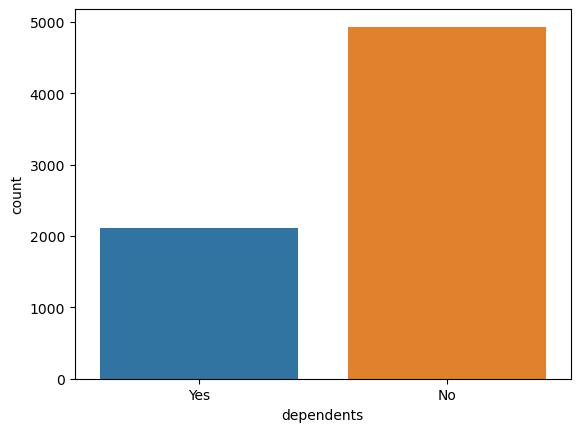

_____________________________________________________
_____________________________________________________

Univariate assessment of feature phone_service:


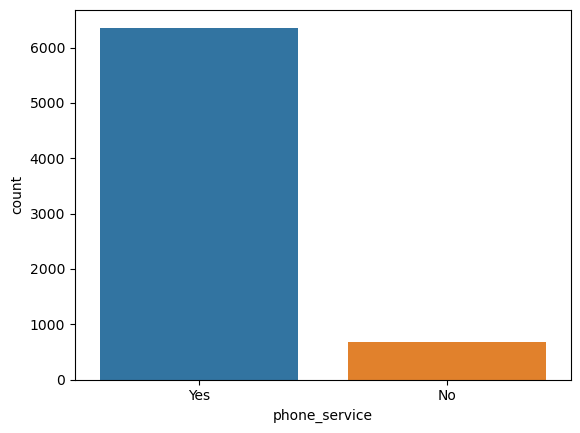

_____________________________________________________
_____________________________________________________

Univariate assessment of feature multiple_lines:


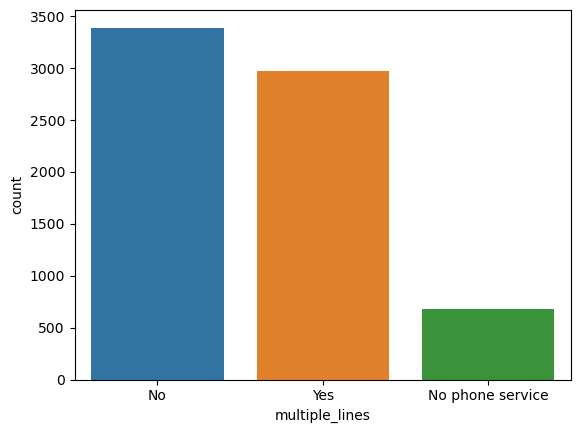

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_security:


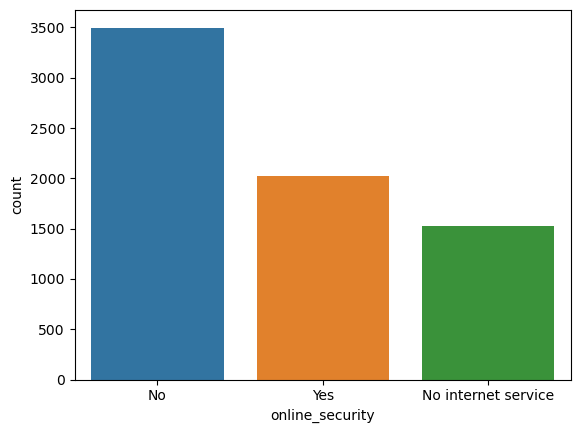

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_backup:


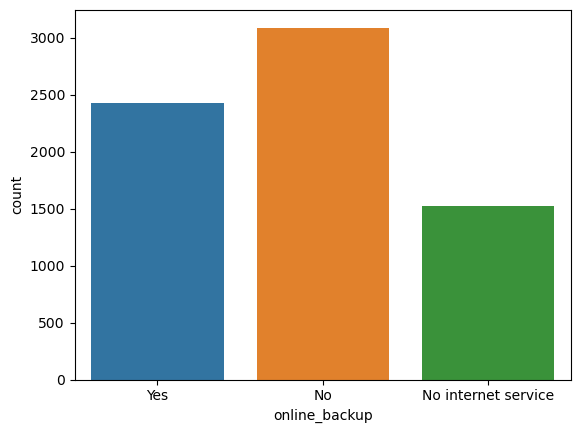

_____________________________________________________
_____________________________________________________

Univariate assessment of feature device_protection:


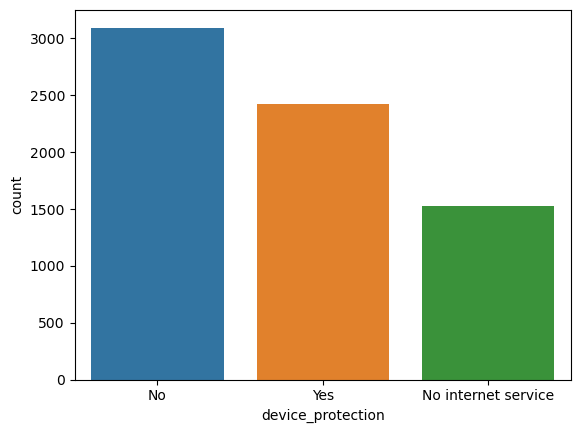

_____________________________________________________
_____________________________________________________

Univariate assessment of feature tech_support:


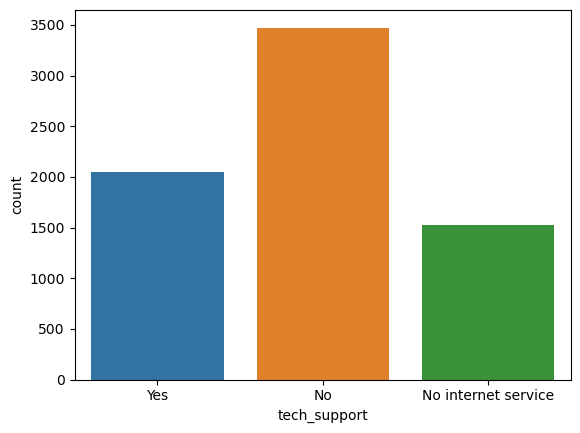

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_tv:


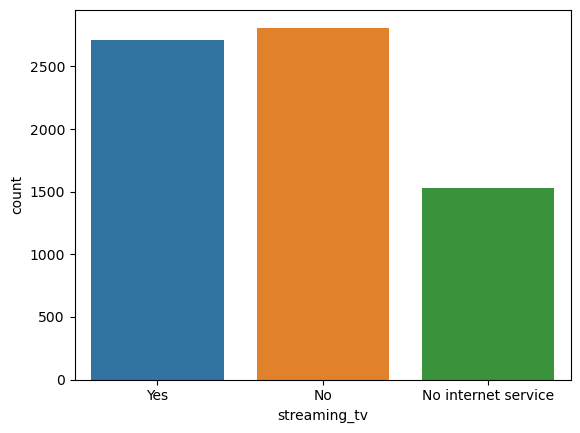

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_movies:


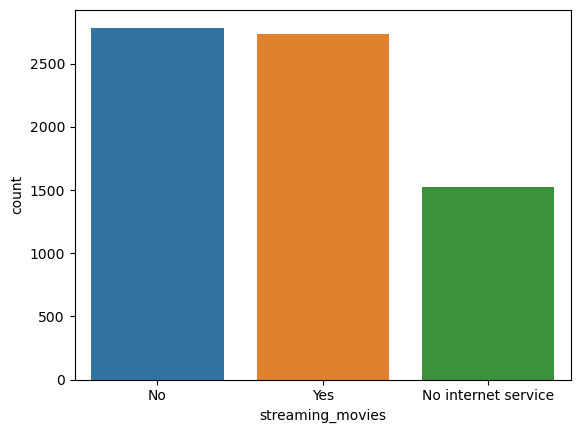

_____________________________________________________
_____________________________________________________

Univariate assessment of feature paperless_billing:


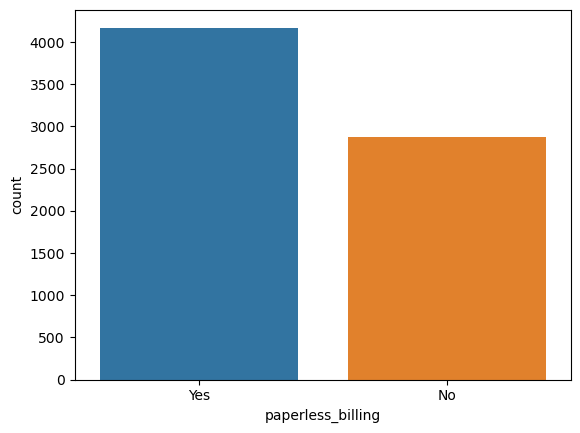

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn:


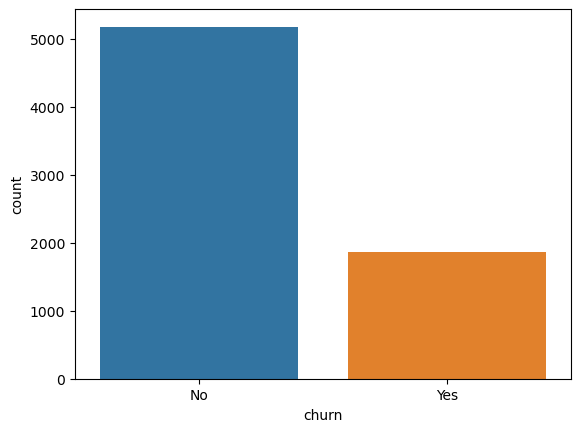

_____________________________________________________
_____________________________________________________

Univariate assessment of feature contract_type:


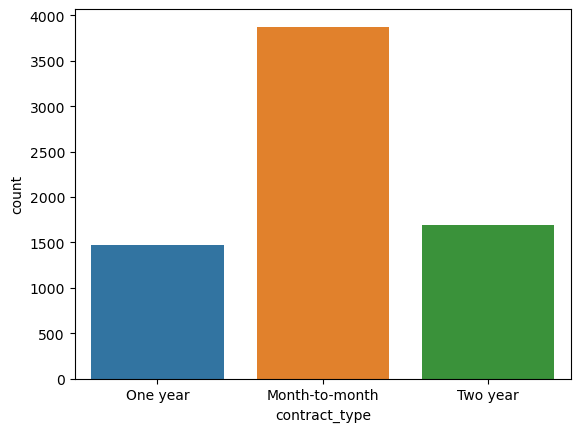

_____________________________________________________
_____________________________________________________

Univariate assessment of feature internet_service_type:


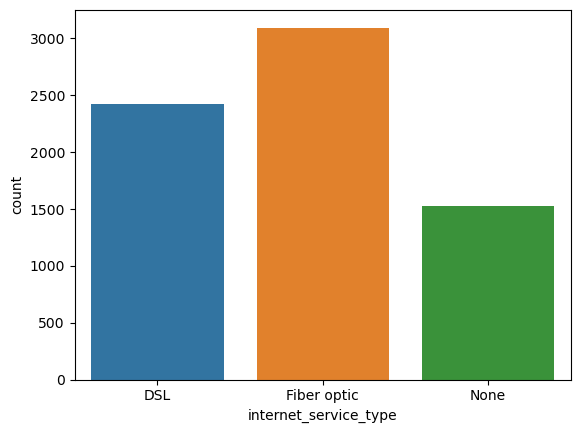

_____________________________________________________
_____________________________________________________

Univariate assessment of feature payment_type:


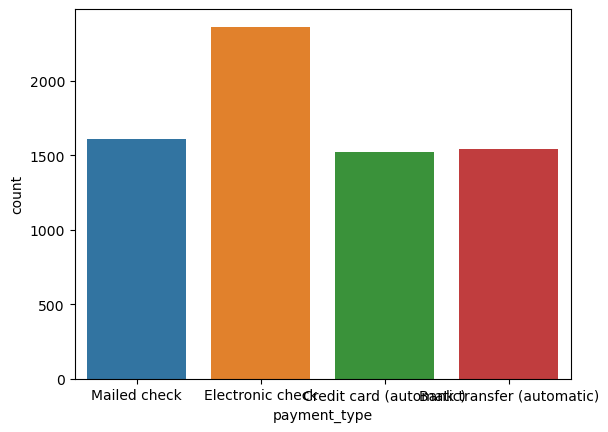

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn_month:


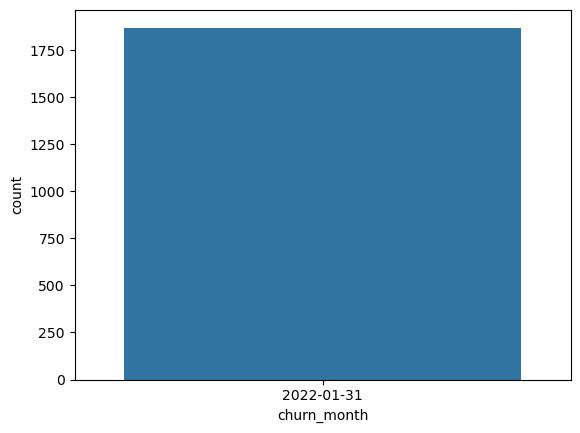

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature tenure: 


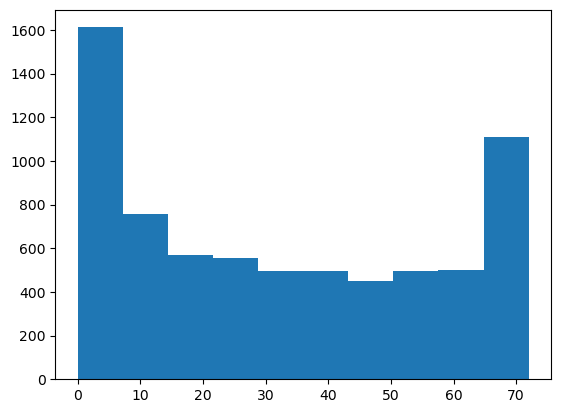

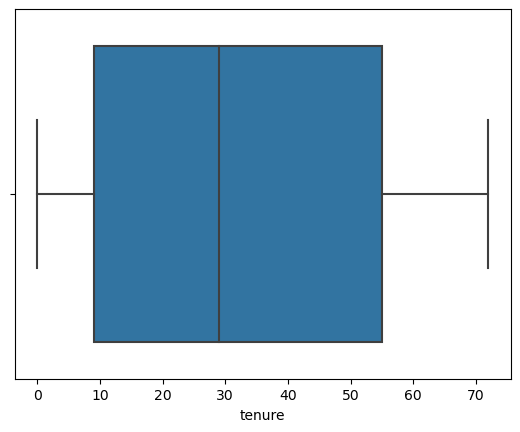

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature monthly_charges: 


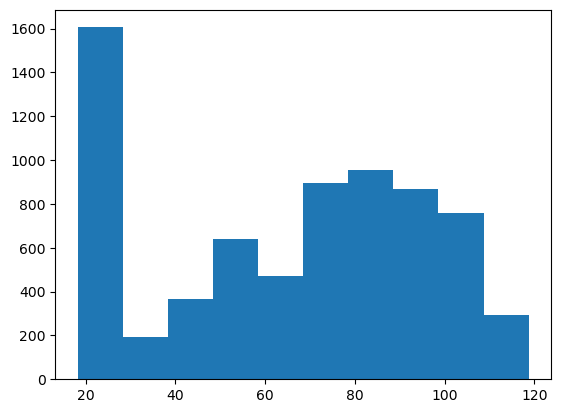

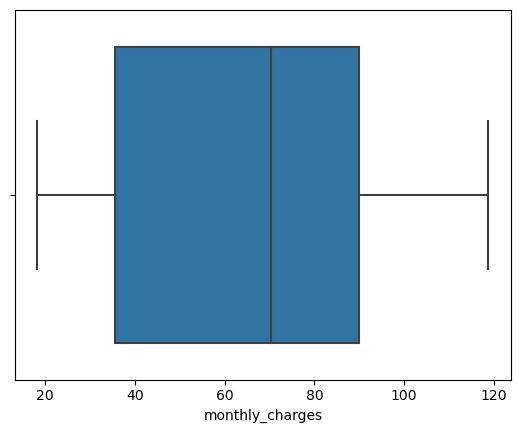

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature total_charges: 


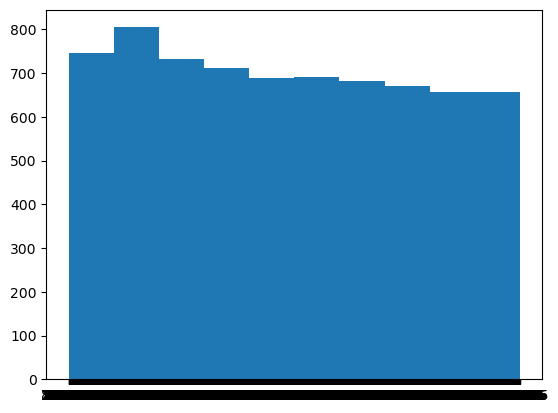

TypeError: Horizontal orientation requires numeric `x` variable.

In [18]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=ut, x=col)
        plt.show()
#         print(
#             pd.concat(ut[col].value_counts(),
#                      ut[col].value_counts(normalize=True),
#                      axis=1))
    else:
        print(f'Univariate feature analysis of feature {col}: ')
        plt.hist(ut[col])
        plt.show()
        sns.boxplot(data=ut, x=col)
        plt.show()
        ut[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

In [ ]:
num_cols

In [ ]:
cat_cols

Now lets look at some univariate visulizations with our clean dataset

In [19]:
# in order to make some initial visualizations, I will put my unclean data into 
# columns to then make some graphs
cat_cols , num_cols = [], []
for col in ct.columns:
    if ct[col].dtype == "o":
        cat_cols.append(col)
    else:
        if ct[col].nunique() < 10:
            cat_cols.append(col)
        else: num_cols.append(col)


In [20]:
# Lets look at our columns
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [21]:
num_cols

['tenure', 'monthly_charges', 'total_charges', 'signup_date']

In [22]:
# for graphoing purposes, Im going to remove the one_hot encoded variables which will
# cause breakage in my code as seen above
cat_cols.remove('gender_Male')
cat_cols.remove('contract_type_One year')
cat_cols.remove('contract_type_Two year')
cat_cols.remove('internet_service_type_Fiber optic')
cat_cols.remove( 'internet_service_type_None')
cat_cols.remove('payment_type_Credit card (automatic)')
cat_cols.remove('payment_type_Electronic check')
cat_cols.remove('payment_type_Mailed check')

In [23]:
explore_cols = cat_cols + num_cols

Univariate assessment of feature gender:


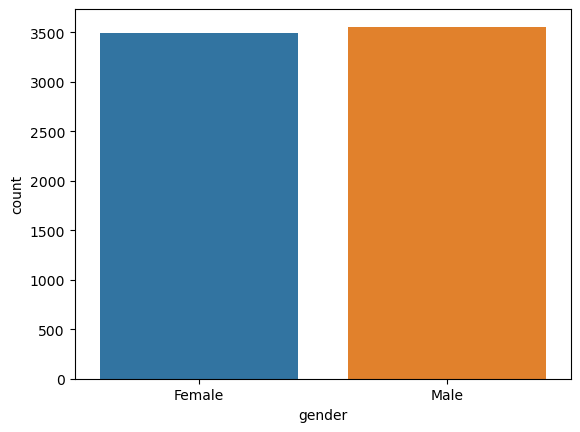

_____________________________________________________
_____________________________________________________

Univariate assessment of feature senior_citizen:


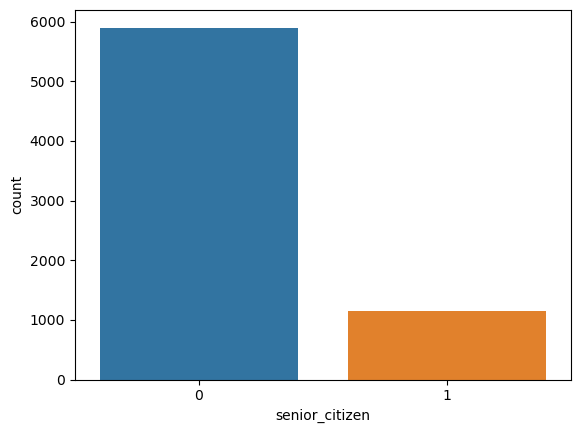

_____________________________________________________
_____________________________________________________

Univariate assessment of feature partner:


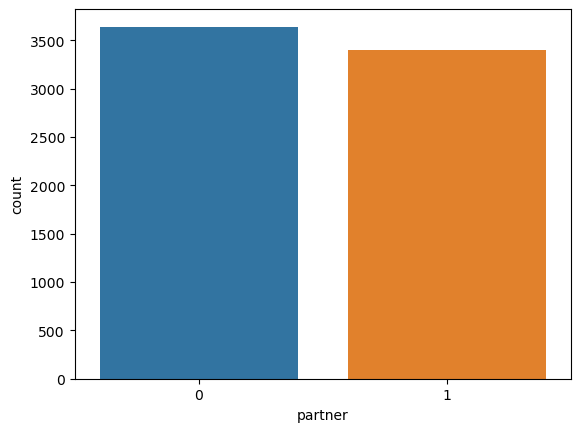

_____________________________________________________
_____________________________________________________

Univariate assessment of feature dependents:


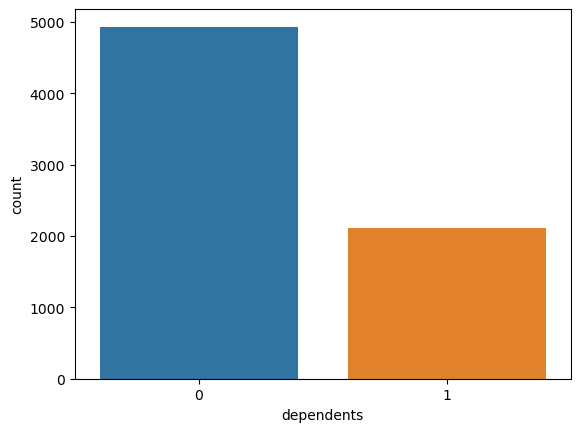

_____________________________________________________
_____________________________________________________

Univariate assessment of feature phone_service:


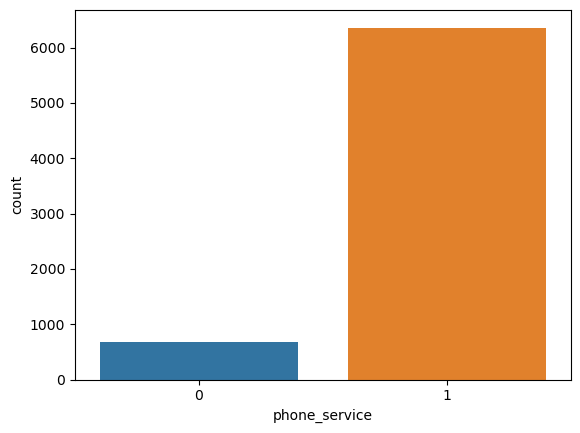

_____________________________________________________
_____________________________________________________

Univariate assessment of feature multiple_lines:


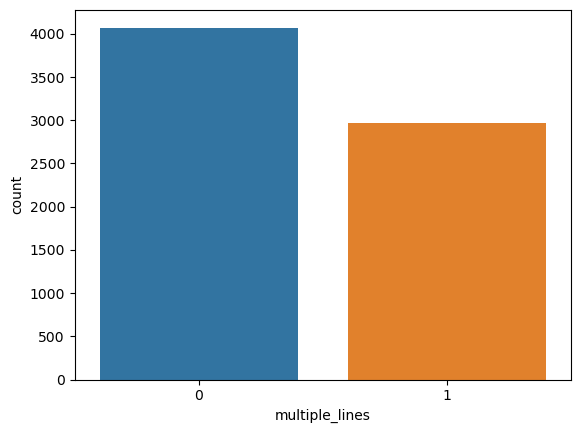

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_security:


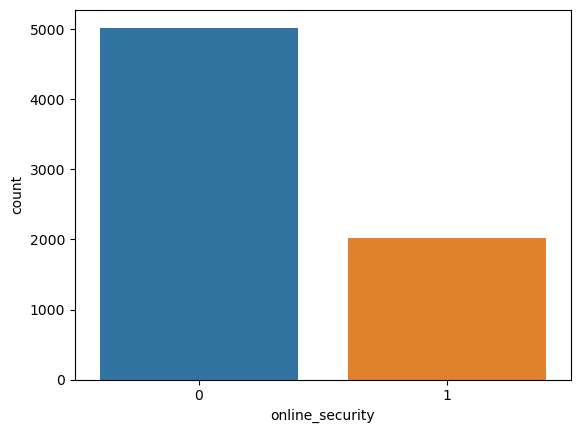

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_backup:


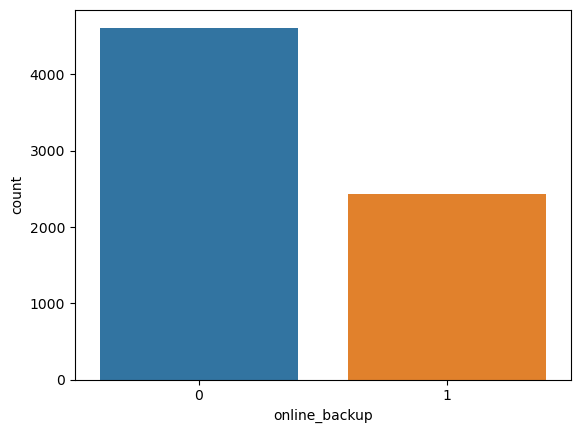

_____________________________________________________
_____________________________________________________

Univariate assessment of feature device_protection:


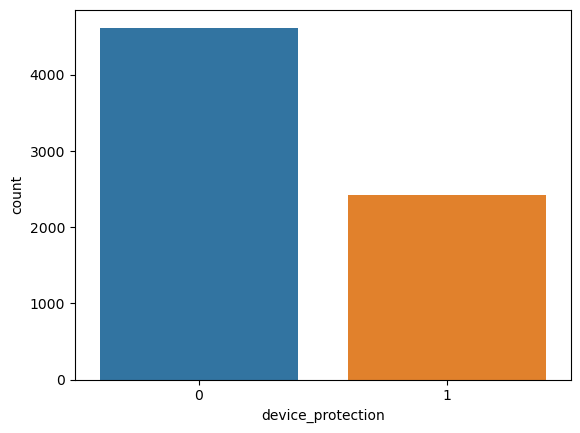

_____________________________________________________
_____________________________________________________

Univariate assessment of feature tech_support:


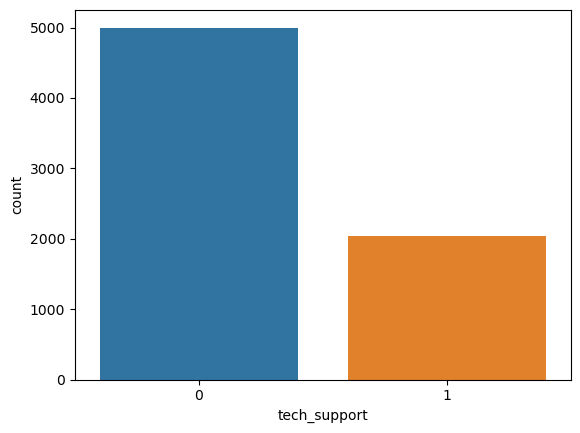

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_tv:


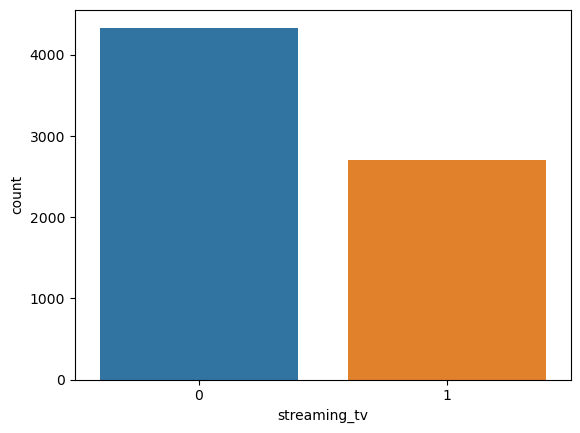

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_movies:


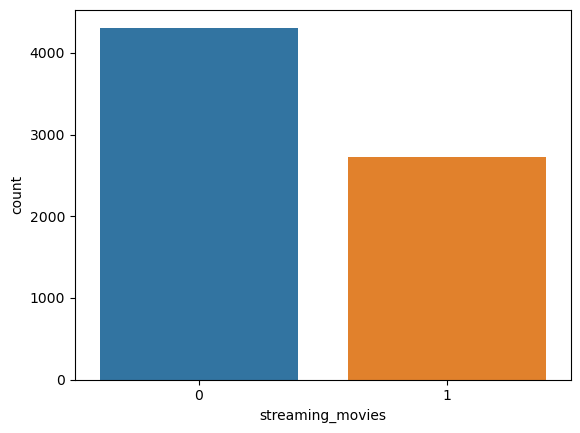

_____________________________________________________
_____________________________________________________

Univariate assessment of feature paperless_billing:


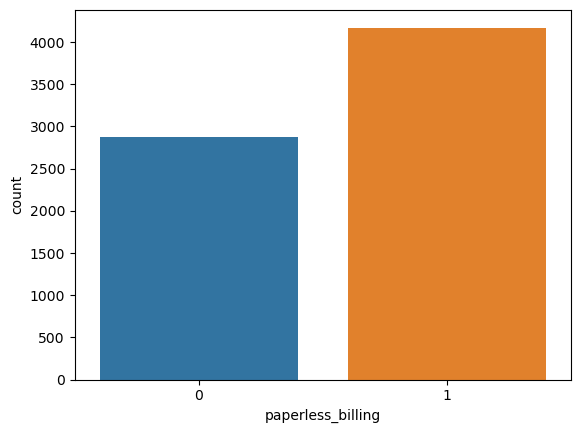

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn:


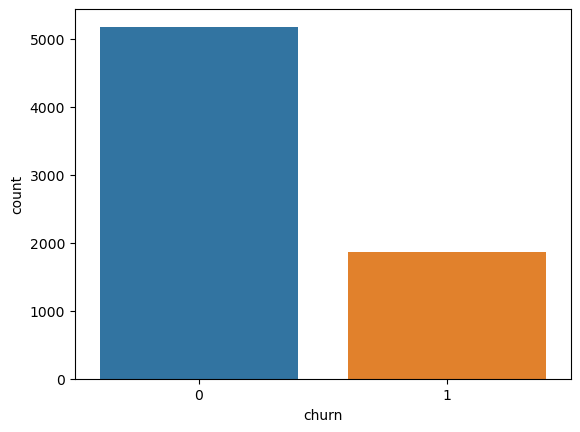

_____________________________________________________
_____________________________________________________

Univariate assessment of feature contract_type:


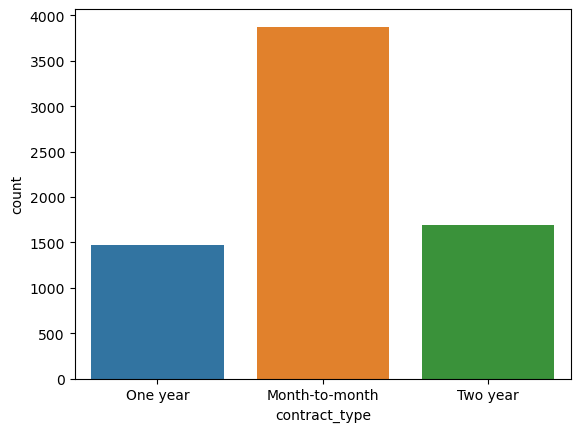

_____________________________________________________
_____________________________________________________

Univariate assessment of feature internet_service_type:


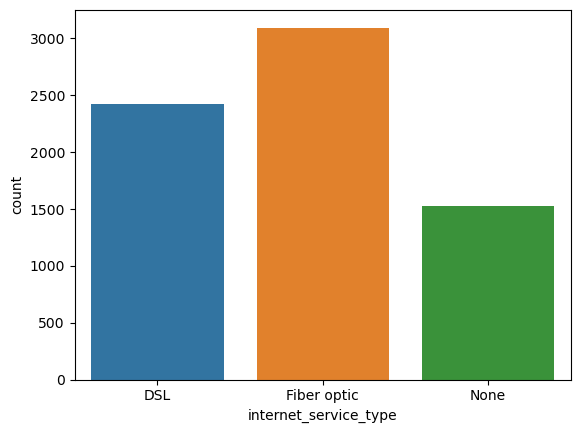

_____________________________________________________
_____________________________________________________

Univariate assessment of feature payment_type:


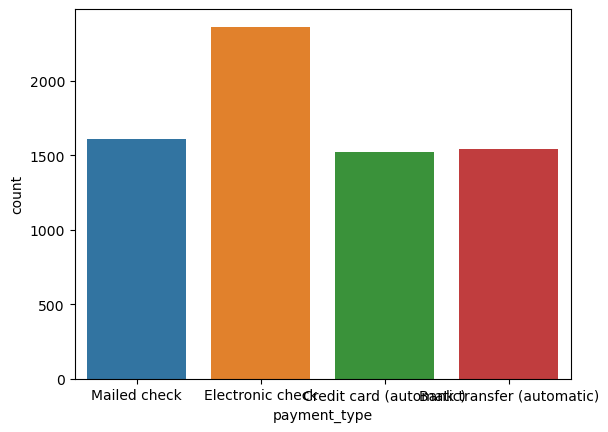

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn_month:


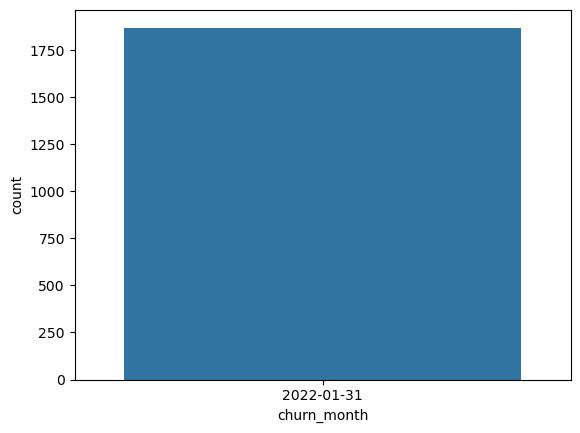

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature tenure: 


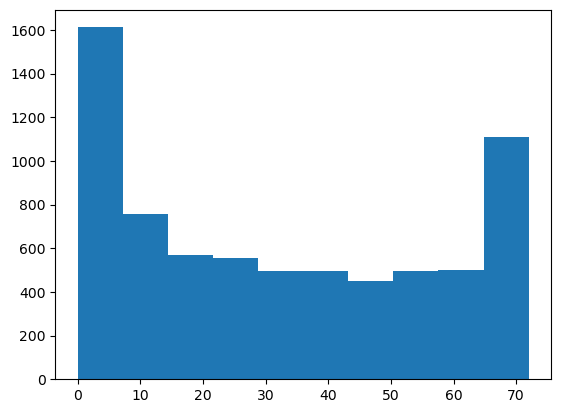

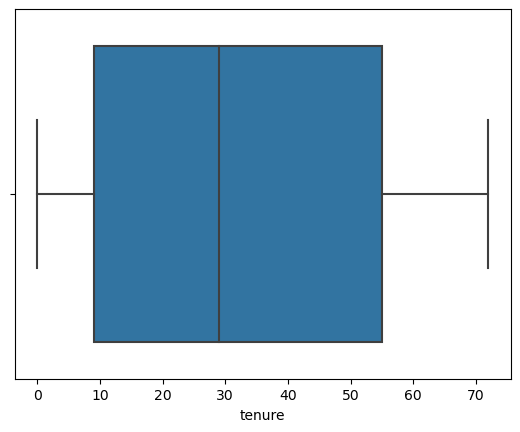

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature monthly_charges: 


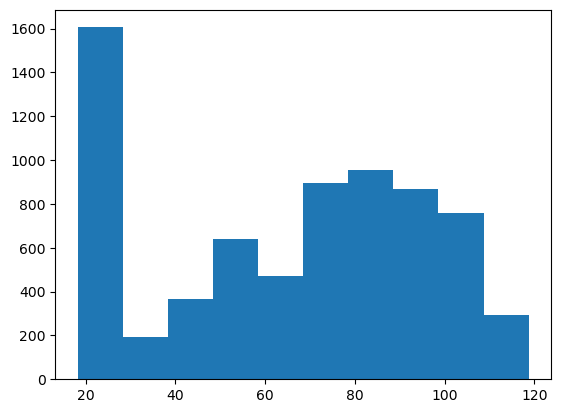

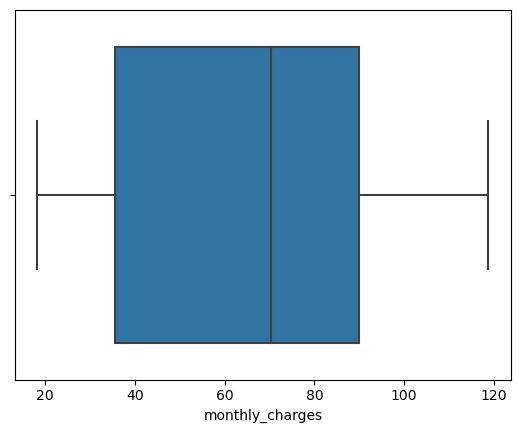

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature total_charges: 


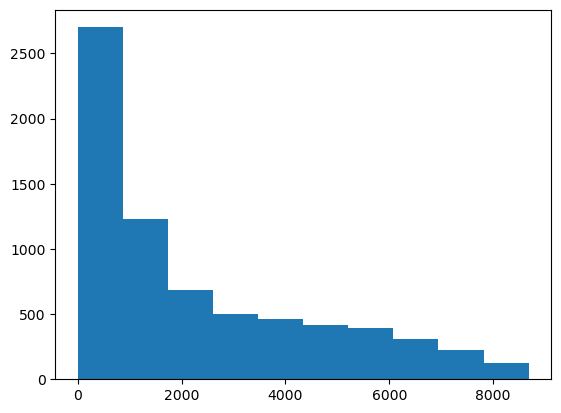

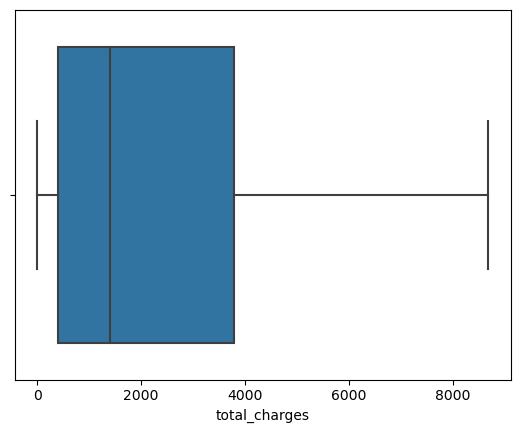

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature signup_date: 


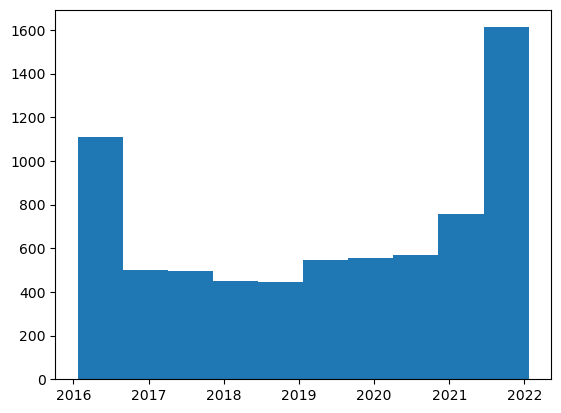

TypeError: Horizontal orientation requires numeric `x` variable.

In [24]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=ct, x=col)
        plt.show()
#         print(
#             pd.concat(ut[col].value_counts(),
#                      ut[col].value_counts(normalize=True),
#                      axis=1))
    else:
        print(f'Univariate feature analysis of feature {col}: ')
        plt.hist(ct[col])
        plt.show()
        sns.boxplot(data=ct, x=col)
        plt.show()
        ut[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

### Takeways from the univariate visualizations 

- gender:
    the ratio of male to female looks pretty even
- senior citizen:
    there are far more non-senior citizens than there are senior citizens
- partner: there is no significant difference in the amount of customers who are partners vs not
- dependents: there are about half the number of people with dependents vs those without 
- phone service: far more people pay for phone service than those who don't
- multiple lines: there are a little bit more customers who do not have multiple lines than those who do
- online security: there are less than half of people who do pay for online security vs those who do not
- online backup: there are about 50% less of people who pay for online backup than those who do not
- device protection: there are about 50% less of people who pay for device protection than those who do not
- tech support: approximately 2/3 more people do not pay for tech support than those who do
- streaming tv: more people do not have tv streaming than those who do
- streaming movies: more people do not have movie streaming than those who do
- paperless billing: more people have paperless billing than than those who have paper billing
- ** churn: we have more customers who have not churned than those who have churned ( about a 1 to 3 ratio)
- contract type:
     - most people have a month to month contract (about 3:1 when compared to either one year or two year)
- internet service type: 
    - most people have fiber optic, but a comparable amount of people have DSL.
    - about half the people who have fiber optic do not have any internet service 
- payment type: 
    - most people use electronic checks
    - there is a pretty uniform distribution of those who use auto, mailed check, and electronic checks
- tenure:
    - the spikes we see are those who are new customers/customers who only stayed with us for a short amount of time OR customers who have been with us for years
    - its a pretty uniform distribution for the tenure time in between 5 and 65 months
    - mean of about 30
- monthly charges:
    - there is a spike of people who pay the minimum, but the majority of people pay somewhere around the mean of ~70
- total charges:
    - the distribution is skewed to the right
    - most people pay somewhere between $40 and $80/mo

According to Reviews.org (https://www.reviews.org/internet-service/cost-of-internet-streaming-and-cell-phone-bills/): 

Average American monthly telecommunications costs:

    Internet services: $57.25 per month
Cell phone plans: $50.17 per month
    Streaming services: $39.96 per month
Total: $147.38 per month

In [25]:
round(ct.monthly_charges.mean(), 2)
# compared to the monthly average, telco is pretty affordable...

64.76

So the metrics observed by Reviews.org are:

    - streaming
    - mobile plans
    - internet

So lets look at what people who pay for these services pay per month

In [26]:
filtered_ct = ct[['internet_service_type', 'phone_service', 'streaming_tv', 'streaming_movies', 'churn', 'monthly_charges', 'tenure', 'total_charges']]

In [ ]:
# lets make some masks

In [31]:
# Mask: lets see who does pay for phone_service, internet, streaming tv and movies
all_services = filtered_ct[(filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1)]
all_services

,internet_service_type,phone_service,streaming_tv,streaming_movies,churn,monthly_charges,tenure,total_charges
3,Fiber optic,1,1,1,1,98.00,13,1237.85
5,DSL,1,1,1,0,69.40,9,571.45
6,Fiber optic,1,1,1,0,109.70,71,7904.25
9,DSL,1,1,1,0,90.45,65,5957.90
11,Fiber optic,1,1,1,0,116.80,72,8456.75
...,...,...,...,...,...,...,...,...
7019,Fiber optic,1,1,1,0,106.70,71,7382.25
7020,Fiber optic,1,1,1,1,96.80,21,2030.30
7027,Fiber optic,1,1,1,0,108.90,34,3625.20
7031,Fiber optic,1,1,1,0,99.15,64,6171.20


In [29]:
len(filtered_ct)

7043

So out of 7043, only 1740 pay for internet, phone, movie streaming, and phone streaming

In [32]:
all_services.monthly_charges.mean()

97.61183908045972

In [33]:
147.38 - all_services.monthly_charges.mean()

49.76816091954028

In [40]:
churned_all_services = all_services.churn.value_counts()[1]
non_churned_all_services = all_services.churn.value_counts()[0]
print(f'Of customers who pay for phone, internet, and streaming services, {non_churned_all_services} customers have stayed with the company, and {churned_all_services} customers have left the company.')

Of customers who pay for phone, internet, and streaming services, 1212 customers have stayed with the company, and 528 customers have left the company.


Reminder: accoring to Reviews.org, the average American pays a total of $$147.38 per month so our customers who pay for internet, phone, and streaming services are paying $97.61 per month, $49.77 less for the same services. 

This leads me to believe that what we are charging for these services is not a contributing factor to churn, but lets look at some bivariate and multivariate analysis.